In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
import metric_learn

In [3]:
%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


### Explore the shape and data included in the spectra files on an example

In [4]:
data = pd.read_csv('Critical_KMONs/2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A.csv')
data

,Name,Run Time,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
0,A,2.0,753,742,733,724,714,709,705,704,...,869,824,901,1280,1552,1414,952,872,1080,1081
1,A,4.0,957,926,898,870,846,829,816,806,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
2,A,6.0,1065,1024,985,945,912,887,872,858,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
3,A,8.0,1066,1022,984,947,914,886,873,861,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
4,A,10.0,1068,1025,985,947,913,889,868,857,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671
5,A,12.0,1071,1027,985,942,912,889,872,861,...,1191,1093,1258,2128,2749,2431,1382,1197,1666,1656
6,A,14.0,1071,1026,984,947,912,888,872,861,...,1188,1090,1259,2113,2720,2407,1378,1194,1656,1646
7,A,16.0,1068,1027,986,947,913,889,870,857,...,1180,1090,1253,2094,2701,2396,1376,1194,1652,1641
8,A,18.0,1075,1030,984,944,919,889,876,863,...,1182,1084,1247,2085,2688,2384,1368,1187,1640,1633
9,A,20.0,1076,1032,989,949,912,888,873,861,...,1179,1088,1251,2080,2673,2368,1362,1189,1638,1627


In [5]:
data.shape

(362, 1203)

In [6]:
# here we adjust the df's row and column indexes 
data_df = data.rename(columns ={'Run Time':'Time'}, inplace = True)
data_df = data.drop('Name', 1)
data_df.set_index('Time', inplace = True)
data_df.columns.name = 'Wavelength'

data_df.head()

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,742,733,724,714,709,705,704,702,698,...,869,824,901,1280,1552,1414,952,872,1080,1081
4.0,957,926,898,870,846,829,816,806,801,794,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
6.0,1065,1024,985,945,912,887,872,858,848,841,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
8.0,1066,1022,984,947,914,886,873,861,852,843,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
10.0,1068,1025,985,947,913,889,868,857,850,842,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [7]:
data_np = data_df.values
data_np

array([[  753,   742,   733, ...,   872,  1080,  1081],
       [  957,   926,   898, ...,  1228,  1758,  1747],
       [ 1065,  1024,   985, ...,  1227,  1733,  1718],
       ..., 
       [65534, 62736, 51964, ..., 11869, 23117, 22547],
       [65534, 62725, 51960, ..., 11845, 23121, 22533],
       [65534, 62684, 51903, ..., 11839, 23112, 22546]], dtype=int64)

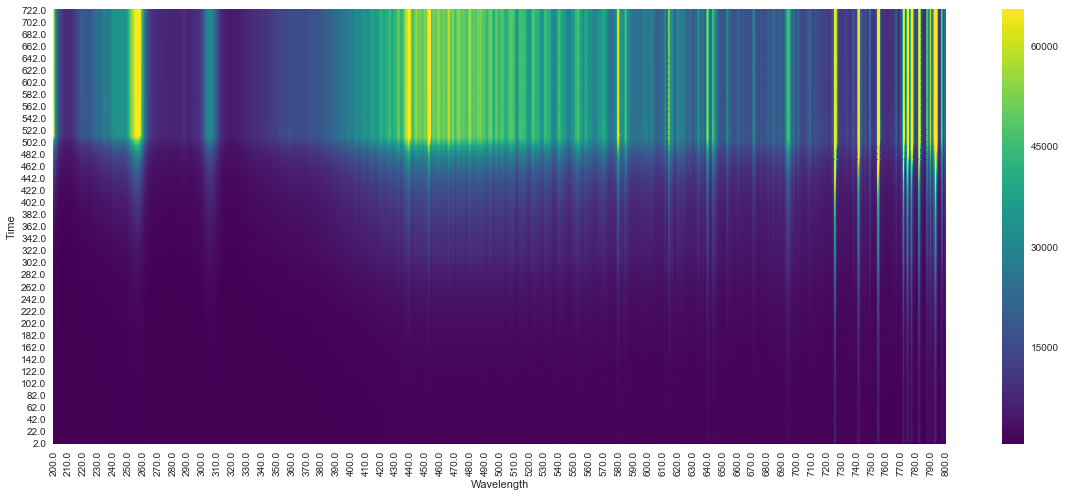

In [8]:
#create seaborn heatmap of data
sns.set_context(rc={"figure.figsize": (20,8)})                                   #increase figure size
ax = sns.heatmap(data_df, xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                #invert Y axis 


### Not a great resolution in the heatmap.  Range of intensity scales from hundreds to >60k.  Let's do a log rescale to see  if the data looks better.


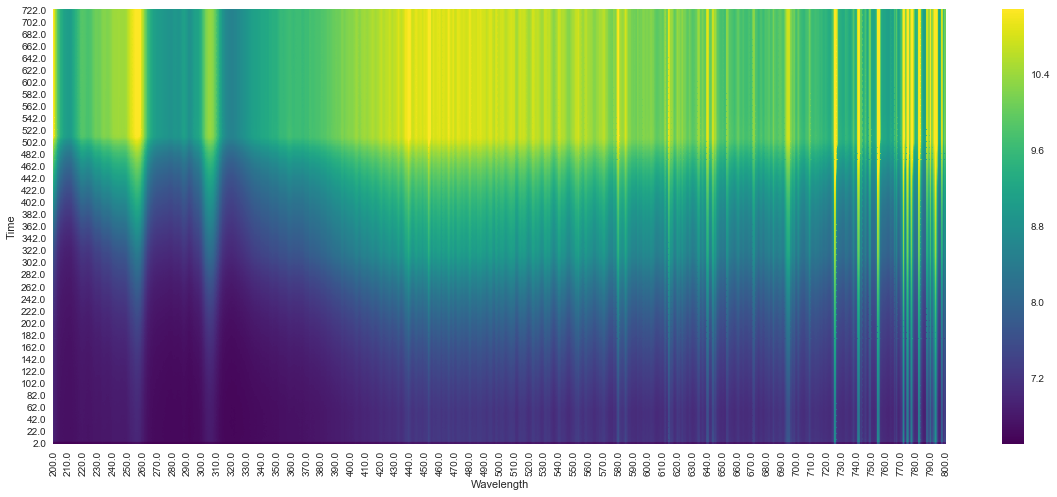

In [9]:
#log scale of data for our heatmap  

ax = sns.heatmap(log(data_df), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

Log scale is much better.
Total time is 722s
EP time near 510s is evident, remainder of time is what is known as overetch.  This portion determines the etched feature profile and final CD.


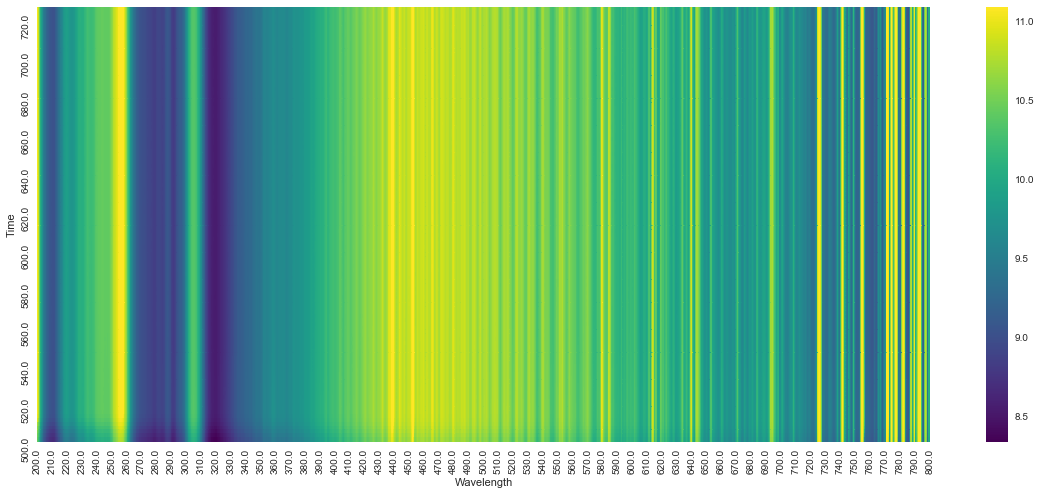

In [10]:
# let's zoom in on the overetch portion >500s.  this shows a bit more detail in the latter third of processing.

df_gt500 = data_df.ix[500:]                                                         #slice from 500s to last row
ax = sns.heatmap(log(df_gt500), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

### Having looked at the data file for shape and conventions used in the files, we now need to get all the training data from csv files 

In [11]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 

import glob
import pprint

dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in glob.glob("Critical_KMONs/*DET*spectra_A_IMO*"):    #use glob to aggregate files/folders into our dict
    #perform the column indexing and transposing to get each df in correct format.
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    #Need to match the Label categorization for the lots#
    
    
    
    
    #End matching#
    
    dataLists[datafile] = df                                        #populate dict values with each csv file of interest
    
    print('datafiles loaded:',datafile)
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict
'''

'\nneed to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs\nkey = string filename that includes the IMOxxxxxx identifier which will be used to match to \'Error\' value \nvalue = dataframe made up of the csv file data \n\nimport glob\nimport pprint\n\ndataLists = {}                                                      #initialize our dict to be filled w df\'s from csv files\n\nfor datafile in glob.glob("Critical_KMONs/*DET*spectra_A_IMO*"):    #use glob to aggregate files/folders into our dict\n    #perform the column indexing and transposing to get each df in correct format.\n    df = pd.read_csv(datafile)  \n    df.rename(columns ={\'Run Time\':\'Time\'}, inplace = True)\n    df = df.drop(\'Name\', 1)\n    df.set_index(\'Time\', inplace = True)\n    df.columns.name = \'Wavelength\'\n    \n    #Need to match the Label categorization for the lots#\n    \n    \n    \n    \n    #End matching#\n    \n    dataLists[datafile] = 

In [12]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 
'''
import glob
import pprint

dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in sorted(glob.glob(r"\\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\*spectra_A_IMO*")):   #use glob to aggregate files/folders into our dict
    '''perform the column indexing and transposing to get each df in correct format.'''
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    '''Need to match the Label categorization for the lots'''
    
    
    
    
    '''End matching'''
    id = str(re.findall('(?<=_A_)[A-Z0-9]+', datafile))
    df = df.iloc[0:350]                                       #will need arrays of all same length so use only the first 350 rows
    dataLists[id] = df                                        #populate dict values with each csv file of interest
    
    print('datafiles loaded:',datafile)
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict

datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-03-14-33-19_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO294852.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-08-17-44-47_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO305019.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-13-44-05_DET7AEP01_PodB_CHA_KMON_Step0_spectra_A_IMO308131.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A_IMO308056.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-11-23-36-27_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO306885.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-13-46-51_DET7AEP02_PodB_CHA_KMON_Step0_spectra_A_IMO308310.csv
datafiles loaded: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A\2017-01-13-20-31-

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,736,728,720,710,704,699,694,693,693,691,...,876,834,910,1307,1571,1416,956,879,1099,1090
4.0,917,890,864,839,820,803,795,788,782,776,...,1259,1142,1347,2415,3135,2717,1463,1278,1861,1828
6.0,1045,1003,965,928,898,877,860,847,838,830,...,1262,1148,1358,2390,3081,2674,1462,1281,1844,1812
8.0,1053,1010,970,931,902,880,862,849,839,830,...,1251,1142,1342,2346,3019,2625,1451,1269,1810,1778
10.0,1052,1008,967,930,905,878,860,849,838,828,...,1249,1143,1334,2325,2993,2607,1448,1264,1791,1763


In [13]:
#we can see the number of data points available that have spectra <- not all of these will have an 'Error' value but all 
#runs with an 'Error' should be found.  Verify later in code.
print (len(dataLists))

170


In [14]:
'''debug cell - confirm a selected dict value for correctness'''

d = dict((k, v) for k, v in dataLists.items() if '307365' in k)
for i in d:
    dfcheck = d[i]
dfcheck.head()


Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,754,742,735,726,716,709,707,706,703,700,...,873,829,902,1283,1561,1426,964,876,1086,1086
4.0,959,928,899,870,846,832,818,809,804,799,...,1234,1118,1310,2307,3033,2673,1456,1249,1800,1792
6.0,1073,1029,988,951,920,893,878,864,853,845,...,1237,1125,1311,2275,2973,2628,1459,1248,1771,1767
8.0,1073,1030,986,945,911,888,872,862,852,843,...,1220,1115,1296,2229,2905,2569,1436,1236,1743,1734
10.0,1074,1030,986,949,916,892,874,860,851,842,...,1215,1112,1290,2193,2861,2540,1424,1226,1723,1716


### The above sequence of code has loaded all of the datasets into a dictionary of dataframes that each represents a run of data that will be labeled according to the corresponding Error for that lot.

In [15]:
'''#pull in the files containing Error data which will be used to define anomylous vs. non-anom '''

raw_Errors = pd.read_csv('7AToy_Shared_WorkingFile.csv')
raw_Errors.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,7A,1,307311,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN
1,7A,2,302809,3524,NaN,800,30,1.5,10.0,0,1,1,1,1,NaN,NaN
2,7A,3,307366,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN
3,7A,4,306917,3524,NaN,800,30,1.5,10.0,0,1,1,1,1,NaN,NaN
4,7A,5,307141,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN


In [16]:
raw_Errors.Error.dropna().describe()

count    144.000000
mean       0.177785
std        0.730176
min       -3.522000
25%       -0.284500
50%        0.185500
75%        0.638500
max        2.005000
Name: Error, dtype: float64

### 'raw_Errors' dataframe has a target column called 'Error' which is being used to demark which points are defined as anomylous vs non-anom.  The absolute value of distance to zero is the metric I will used here.  I will use a 2sigma cutoff to assign 

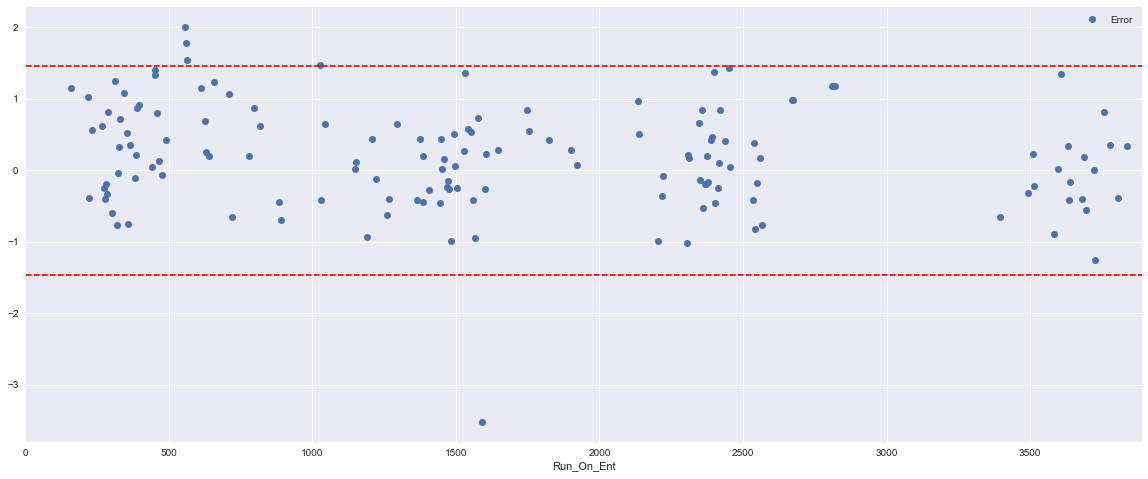

In [17]:
'''scatterplot with 2s cutoff lines shown'''

cutoff = 2 * raw_Errors.Error.std()
raw_Errors.plot(x = 'Run_On_Ent', y = 'Error', style = 'o')
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')

In [18]:
'''
Cell creates a new dataframe with the data pts labeled as anomylous = 1, non-anom = 0
'''
raw_Errors2 = raw_Errors.set_index('Run_On_Ent').dropna()                  #reset index to run order
clas_Errors = raw_Errors2[['Entity','Lot','Error']].copy()                 #copy columns needed for analysis to new df
clas_Errors["Label"] = np.where(abs(clas_Errors['Error']) > cutoff, 1, 0)  #classify pt as anom or non-anom
                              
clas_Errors.set_index('Lot', inplace = True)
clas_Errors.loc[clas_Errors['Label'] == 1]                                 #show anomylous rows ('Label' = 1)

,Entity,Error,Label
Lot,,,
308055A,7A,2.005,1
308501,7A,1.782,1
306641A,7A,1.537,1
310357,7A,1.465,1
310369,7A,-3.522,1


### we can see there will be 5 anomalous pts in our training set

In [19]:
print (type(clas_Errors)) 

<class 'pandas.core.frame.DataFrame'>


In [20]:
print (type(dataLists)) 

<class 'dict'>


In [21]:
dataLists2 = {}
matchcounter = 0
missingcounter = 0
for k in dataLists:
    #print ('k=',k)
    id = re.findall('(?<=IMO)[A-Z0-9]+', k)[0]
    #print('id=',id)
    ndf = clas_Errors[clas_Errors.index == id]
    #print (len(ndf))
    if len(ndf) > 0:
        category = (ndf.iloc[-1]['Label'])
        dataLists2[k] = (category, dataLists[k])
        matchcounter +=1
        #print(dataLists2[k])
    else: 
        '''Lot not in dataLists'''
        #dataLists2[k] = (None, dataLists[k])  --> don't keep non-matching data
        missingcounter += 1
        continue
print ('missing', missingcounter)
print ('match', matchcounter)
dataLists2

missing 46
match 124


{"['IMO294847']": (0,
  Wavelength  200.0  200.5  201.0  201.5  202.0  202.5  203.0  203.5  204.0  \
  Time                                                                        
  2.0           742    732    722    712    704    699    698    696    694   
  4.0           943    912    883    857    833    816    805    797    791   
  6.0          1058   1016    978    939    909    888    865    854    844   
  8.0          1067   1022    979    941    907    886    867    855    846   
  10.0         1069   1025    983    940    907    885    868    855    845   
  12.0         1067   1021    979    940    909    888    867    855    844   
  14.0         1063   1019    977    940    908    884    865    853    843   
  16.0         1070   1029    984    943    913    887    868    854    843   
  18.0         1069   1026    984    941    914    889    868    856    847   
  20.0         1073   1027    983    944    910    887    868    855    845   
  22.0         1069   1026    

In [22]:
len(dataLists2) #only 124 matches of spectra and error data

124

In [23]:
y = {} # our labels
X = {} # our spectra data
for k,(label, spectra) in dataLists2.items():
    y[k] = label
    X[k] = spectra
    last = k
print ('last key', k)
X[k].head()

last key ['IMO318134A']


Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,739,732,723,713,704,700,697,694,693,692,...,864,825,899,1272,1530,1388,945,874,1079,1072
4.0,945,914,886,858,834,819,806,797,791,786,...,1236,1126,1317,2321,3016,2634,1439,1246,1796,1776
6.0,1059,1016,977,940,904,886,869,856,844,835,...,1240,1132,1322,2293,2963,2594,1441,1249,1778,1755
8.0,1062,1022,982,940,911,887,866,855,845,835,...,1228,1119,1303,2246,2900,2543,1421,1239,1749,1722
10.0,1064,1022,979,940,909,884,865,852,843,835,...,1221,1121,1294,2218,2862,2515,1417,1229,1733,1708


### unpack the dictionary tuples to make numpy arrays of the values for labels and spectra and prep the data formats into ndarrays suitable for sklearn modules.

In [24]:
y = [] # our labels
X = [] # our spectra data

for k,(label, spectra) in dataLists2.items():
    y.append(label)
    X.append(spectra.values)
#    if spectra.shape[0] < minim: minim = spectra.shape[0]
    last = k
#print('minum')

y = (numpy.array(y))  
X = (numpy.array(X))       #give me a 3-D array (124,350,1201)
print('X shape:', X.shape)

# sklearn will require 2D array for data input so we will flattend 3D array to 2D 350x1201 = 42350
nsamples,nx,ny = X.shape
d2_X = X.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X.shape)
print('labels y shape:', len(y))
#print('last spectra array \n',X[-1])

X shape: (124, 350, 1201)
reshaped d2_X: (124, 420350)
labels y shape: 124


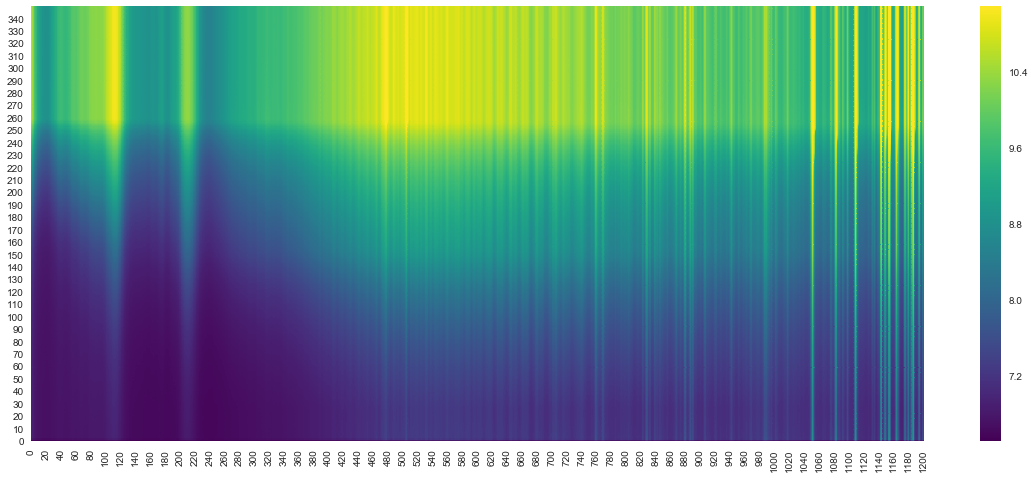

In [25]:
#spot check plot of the last spectra array element showing that the data indeed appears intact & correct
some_spectra_image = X[-1]
ax = sns.heatmap(log(some_spectra_image), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()          

### Now we can attempt to use the data for training

### too many features and the LMNN fails for memory.  our full set 420k+ features when flattened!!! 50 features takes seconds, 500 features takes 5-10minutes

In [47]:
from metric_learn import LMNN
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn.fit(d2_X, y)
X_lmnn = lmnn.transform()
print('lmnn metric shape:', lmnn.metric().shape)
lmnn.metric()

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\metric_learn-0.4.0-py3.6.egg\metric_learn\lmnn.py:62: UserWarning: use_pca does nothing for the python_LMNN implementation
  warnings.warn('use_pca does nothing for the python_LMNN implementation')


MemoryError: 

In [61]:
#attempt metric learn w toy that uses every other column to prevent MemoryErrors
X_e2c = X[:,::8]
nsamples,nx,ny = X_e2c.shape
d2_X_e2c = X_e2c.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X_e2c.shape)
print('labels y shape:', len(y))
#print('last spectra array \n',X[-1])
                
#print('reshaped d2_X_toy:', d2_X_toy.shape)
#print('labels y_toy shape:', len(y_toy))

reshaped d2_X: (124, 52844)
labels y shape: 124


### Laptop requires shrinking dataset past every 8th column at least, need to attempt on bigger machine 

In [63]:
lmnn = LMNN(k=4, learn_rate=1e-6)
lmnn.fit(d2_X_e2c, y)
X_lmnn = lmnn.transform()
print('lmnn metric shape:', lmnn.metric().shape)
lmnn.metric()

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\metric_learn-0.4.0-py3.6.egg\metric_learn\lmnn.py:62: UserWarning: use_pca does nothing for the python_LMNN implementation
  warnings.warn('use_pca does nothing for the python_LMNN implementation')


MemoryError: 

### Look into PCA

In [40]:
from sklearn.decomposition import PCA

#this code snip will calculate the number of dimensions for PCA to retain 95% of variance in X
pca = PCA()
pca.fit(d2_X)
#cumsum = np.cumsum(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  
d = np.argmax(var1 >= 95) + 1            
print ('The minimum number of dimensions to retain 95% variance = ',d)
print (var1)

The minimum number of dimensions to retain 95% variance =  6
[ 73.02  86.61  90.93  93.11  94.91  96.19  96.91  97.43  97.86  98.14
  98.36  98.55  98.72  98.85  98.97  99.07  99.16  99.24  99.32  99.39
  99.44  99.49  99.53  99.57  99.61  99.64  99.67  99.7   99.72  99.74
  99.76  99.78  99.79  99.8   99.81  99.82  99.83  99.84  99.85  99.86
  99.87  99.88  99.89  99.9   99.91  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92  99.92
  99.92  99.92  99.92  99.92]


(0, 10)

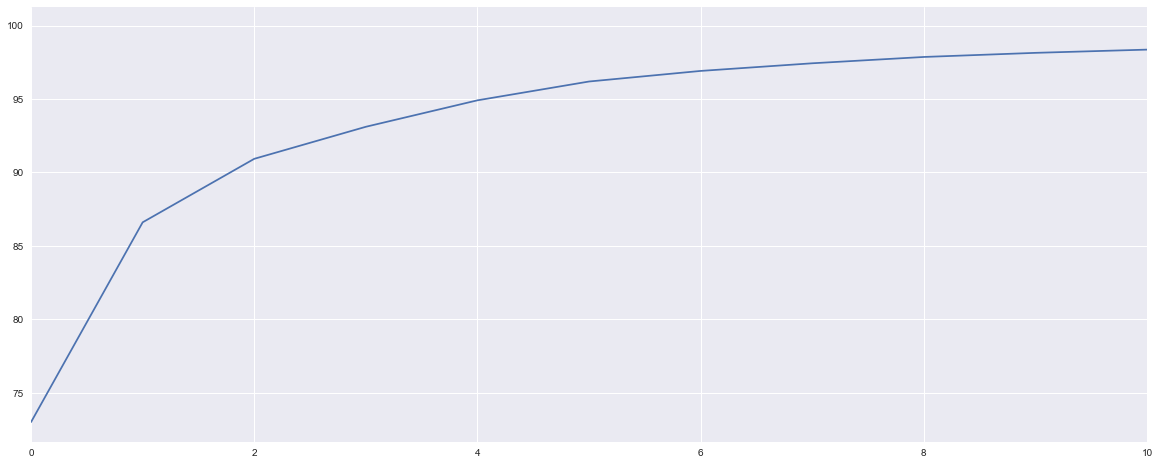

In [41]:
# Let's plot the explained variance vs dimensions
plt.plot(var1)
plt.xlim([0,10])
#note the dimensions start at 0, so 95% is 5+1

In [43]:
# we will run PCA formatted to retain 95% of variance by inserting value between 0-1
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(d2_X)
print (X_reduced.shape)
print (X_reduced)

(124, 6)
[[  6.98110632e+05   3.39060539e+05  -1.09856278e+04   1.74593378e+05
    7.56147806e+03  -1.26778331e+04]
 [ -1.04127937e+06   3.48508462e+05   1.91479964e+05   2.99102445e+05
   -6.62352616e+04   8.97304301e+04]
 [  2.40603625e+04   3.12017858e+05  -2.11649956e+05   1.42298960e+05
   -1.51387634e+04   4.30826964e+04]
 [ -8.12236067e+05   3.43897103e+05   5.39750217e+04   2.52174892e+05
   -4.84399449e+04   7.85549191e+04]
 [  4.95609126e+05   3.07780793e+05  -5.84450813e+04   1.31072731e+05
    6.89470919e+04   7.50248267e+04]
 [  4.23947601e+05   3.05703881e+05  -7.62782891e+04   1.08217103e+05
    4.82504846e+04   8.96703466e+04]
 [ -4.60952619e+05   3.37324062e+05  -5.95341266e+04   8.83624279e+04
   -2.29073451e+03   6.38990002e+04]
 [  8.86119789e+05   3.06376531e+05   1.49788736e+05   1.18822356e+05
    1.09227799e+05   2.25574032e+04]
 [ -4.20281910e+05   3.36152733e+05  -6.95673310e+04   6.91593531e+04
    2.47641570e+04   5.89016261e+04]
 [ -5.42187274e+04   3.29166